# Summary of scikit-learn methods and usage(scikit-learnの方法と使用法の概要)

この章では、これまで見てきたscikit-learn APIの主要部分を簡単に要約し、コードを簡素化するいくつかの方法を示します。

## The Estimator Interface

scikit-learnのすべてのアルゴリズムは、前処理、教師あり学習、または教師なし学習アルゴリズムに関係なく、すべてクラスとして実装されます。  
これらのクラスは、scikit-learnでは推定量(esrimartors)と呼ばれます。  
アルゴリズムを適用するには、最初に特定のクラスのオブジェクトをインスタンス化する必要があります。

In [2]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

estimatorクラスにはアルゴリズムが含まれ、アルゴリズムを使用してデータから学習されたモデルも格納されます。  

モデルオブジェクトを作成するときは、モデルのパラメータを設定する必要があるときでもあります。  
これらのパラメータには、第2章と第3章で詳細に説明したように、正則化(regularization)、複雑さの制御(complexity control)、検索するクラスターの数(number of cluster to find)などが含まれます。  

すべての推定量(estimator)には、モデルの構築に使用される近似法(fit method)があります。  
fitメソッドでは、常に最初の引数として、numpy 配列または scipy スパース行列として表されるデータXが必要です。  
ここで、各行は単一のデータポイントを表します。  
データXは常に、連続（浮動小数点）エントリを持つnumpy配列または scipy スパース行列であると見なされます。  
教師ありアルゴリズムには、回帰(regression)または分類(classification)のターゲット値、つまり既知の出力ラベルまたは応答を含む1次元のnumpy配列であるy引数も必要です。  

scikit-learnで学習したモデルを適用する主な方法は2つあります。  
yのような新しい出力の形式で予測を作成するには、predictメソッドを使用します。  
入力データXの新しい表現を作成するには、transformメソッドを使用します。  
表api_summaryは、predictメソッドとtransformメソッドのユースケースをまとめたものです。

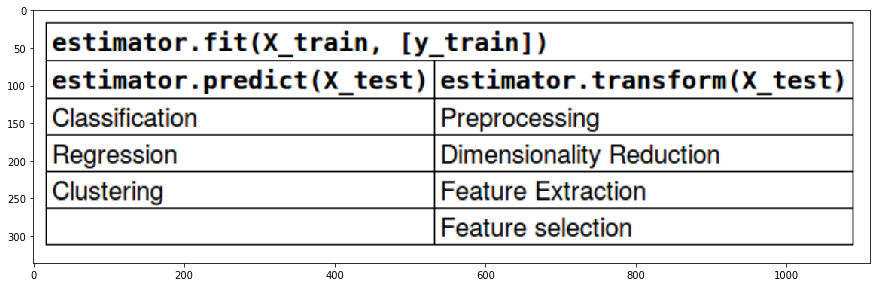

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

api_summary = "images/api_summary.png"
img = plt.imread(api_summary)
plt.figure(figsize=(15, 8))
plt.imshow(img)

さらに、すべての監視ありモデルには、モデルの評価を可能にするscore（X_test、y_test）メソッドがあります。  

ここで、X_trainとy_trainはトレーニングデータとトレーニングラベルを参照し、X_testとy_testはテストデータとテストラベルを参照します（該当する場合）。

### Fit resets a model(Fitはモデルをリセットします)

scikit-learnモデルの重要な特性は、fitを呼び出すと、モデルが以前に学習したすべてのものが常にリセットされることです。  
したがって、あるデータセットでモデルを構築してから、別のデータセットでもう一度fitを呼び出すと、モデルは最初のデータから学習したすべてのものを「忘れ」ます。  
モデルで何度でもfitを呼び出すことができ、結果は「新しい」モデルでfitを呼び出すのと同じになります。

In [14]:
# いくつかのデータを取得する
from sklearn.datasets import make_blobs, load_iris
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# irisをロード
iris = load_iris()

# いくつかのブロブを作成します
X, y = make_blobs(random_state=0, centers=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# irisデータセットでモデルを構築する
logreg = LogisticRegression(max_iter=200)
logreg.fit(iris.data, iris.target)

# モデルをblobデータセットに再度適合させる
logreg.fit(X_train, y_train)

# 結果は、「新しい」モデルのトレーニングと同じです。
new_logreg = LogisticRegression(max_iter=200)
new_logreg.fit(X_train, y_train)

# 2つのモデルによる予測は同じです
pred_new_logreg = new_logreg.predict(X_test)
pred_logreg = logreg.predict(X_test)

pred_logreg == pred_new_logreg

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

ご覧のとおり、最初にlogregモデルをirisデータセットに適合させても効果はありません。  
アイリスデータセットには、blobsデータセットとは異なる数のフィーチャとクラスがありますが、最初のフィットに関するすべては、フィットが再度呼び出されたときに消去されます。  

次に、一般的なタスクのコードを減らし、計算を高速化できるいくつかのショートカットについて説明します。  
よりコンパクトなコードを書く最初の方法は、メソッドチェーンを利用することです。

### Method chaining

すべてのscikit-learnモデルのfitメソッドはselfを返します。これにより、次のようなコードを記述できます。

In [15]:
# モデルをインスタンス化し、1行に収めます
logreg = LogisticRegression().fit(X_train, y_train)

ここでは、fitの戻り値（self）を使用して、トレーニング済みモデルを変数logregに割り当てました。  
このメソッド呼び出しの連結（ここでは__init__、次にfit）は、メソッドチェーンと呼ばれます。  
scikit-learnでのメソッドチェーンのもう1つの一般的なアプリケーションは、1行に収めて予測することです。

In [16]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

最後に、モデルのインスタンス化、フィッティング、予測を1行で行うこともできます。

In [18]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

ただし、この非常に短いバリアントは理想的ではありません。  
1行で多くのことが発生しているため、コードが読みにくくなる可能性があります。  
さらに、近似ロジスティック回帰モデル(fitted logisric regression model)はどの変数にも保存されません。  
そのため、それを検査したり、他のデータを予測するために使用したりすることはできません。

### Shortcuts and efficient alternatives(ショートカットと効率的な代替手段)

多くの場合、モデルをあるデータセットに適合させてから、同じデータをすぐに予測したり、変換したりする必要があります。  
これらは非常に一般的なタスクであり、単にfitを呼び出してから予測するか、fitしてから変換するよりも効率的に計算できることがよくあります。  
このユースケースでは、predictメソッドを持つすべてのモデルにfit_predictメソッドがあり、transformメソッドを持つすべてのモデルにもfit_transformメソッドがあります。  
PCAを使用した例を次に示します。

In [19]:
from sklearn.decomposition import PCA
pca = PCA()

# fitとtransformを順番に呼び出す（メソッドチェーンを使用）
X_pca = pca.fit(X).transform(X)

# 同じ結果ですが、より効率的な計算
X_pca_2 = pca.fit_transform(X)

fit_transformとfit_predictはすべてのアルゴリズムで効率的であるとは限りませんが、トレーニングセットを予測したり、変換したりするときにこれらを使用することをお勧めします。  

クラスタリングや多様体学習(manifold learnig)メソッドなど、第3章で見た教師なしメソッドの場合、fit_transformとfit_predictを使用することが唯一のオプションです。  
たとえば、DBSCANにはpredictメソッドがなく、fit_predictのみがあり、t-SNEにはtransformメソッドがなく、fit_transformのみがあります。  
T-SNEとDBSCANは、新しいデータには適用できないアルゴリズムであり、トレーニングデータにのみ適用できます。

### Impotant Attributes(重要な属性)

scikit-learnには、モデルが何を学習したかを調べることができるいくつかの標準属性があります。  
これらの属性はすべて、fitの呼び出し後に使用可能になります。  
前述したように、データから学習したすべての属性には、末尾にアンダースコアが付いています。  

次の一般的な属性についてはすでに説明しました。  

- クラスタリングアルゴリズムの場合、labels_属性はトレーニングデータのクラスターメンバーシップを格納します。
- 多様な学習(manifold learning)アルゴリズムの場合、embedding_属性は、トレーニングデータの埋め込み（変換）を低次元空間に格納します。
- 線形モデルの場合、coef_属性は重み(weight)または係数(coefficient)ベクトルを格納します。
- 線形分解(linear decomposition)および次元削減方法(demensionality reduction method)の場合、components_はコンポーネントの配列を格納します（第3章の図分解(figure decomposition)の加法分解(additive decompodition)のプロトタイプ）。  

さらに、分類器(classifiers)の場合、classes_には、分類器(classifier)がトレーニングされたクラスの名前、つまりトレーニングラベルy_trainの一意(unique)のエントリが含まれます。

In [21]:
import numpy as np
logreg = LogisticRegression(max_iter=200)

# 元のデータを使用したモデルの適合
logreg.fit(iris.data, iris.target)
print("unique entries of iris.target: %s" % np.unique(iris.target))
print("classes using iris.target: %s" % logreg.classes_)

# 各ターゲットをクラス名で表します
named_target = iris.target_names[iris.target]
logreg.fit(iris.data, named_target)
print("unique entries of named_target: %s" % np.unique(named_target))
print("classes using named_target: %s" % logreg.classes_)

unique entries of iris.target: [0 1 2]
classes using iris.target: [0 1 2]
unique entries of named_target: ['setosa' 'versicolor' 'virginica']
classes using named_target: ['setosa' 'versicolor' 'virginica']


### Summary and book

これで、scikit-learnの監視対象モデルと監視対象外モデルのインターフェイス、およびそれらの使用方法に精通しているはずです。  
さまざまなモデルの使用方法を十分に理解した上で、モデルの評価や選択など、より複雑なトピックを続けていきます。